In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
data.shape

(11251, 15)

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
#drop unrelated /blank columns
data.drop(['Status','unnamed1'],axis=1, inplace=True)

In [8]:
#checking for the null values.
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#dropping the null values from the dataset.
data.dropna(inplace=True)

In [10]:
data.shape

(11239, 13)

In [11]:
#changing the datatype.
data['Amount'] = data['Amount'].astype('int64')

In [12]:
data['Amount'].dtypes

dtype('int64')

In [13]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
#describe() method returns the description of the data from the dataset like(std, count, min, median, max)
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
#use describe for the specific columns.
data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis.

Text(0.5, 1.0, 'Count plot for Gender')

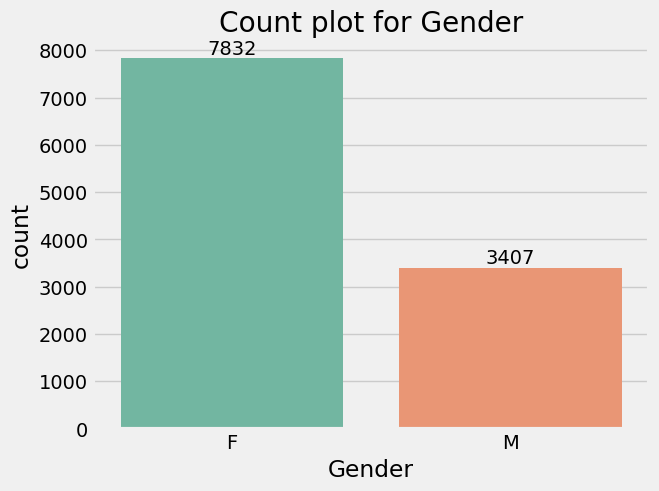

In [16]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x = 'Gender', data = data, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)


plt.title("Count plot for Gender")

<Axes: xlabel='Gender', ylabel='Amount'>

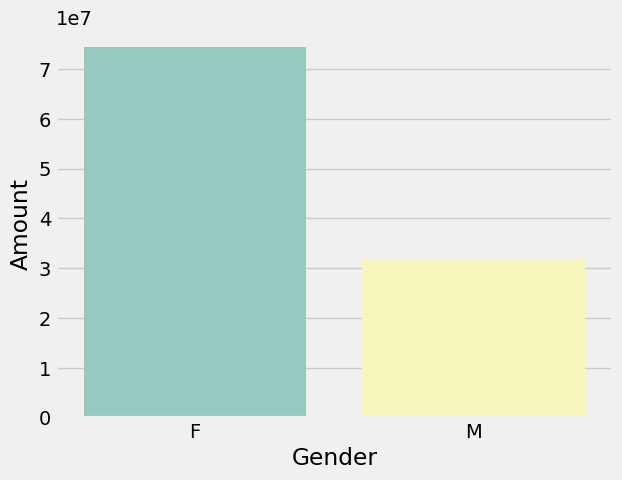

In [17]:
plt.style.use('fivethirtyeight')
sales_gen = data.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x = 'Gender',y = 'Amount', data = sales_gen,palette = 'Set3')

#### From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men.

Text(0.5, 1.0, 'Count plot of Age Group')

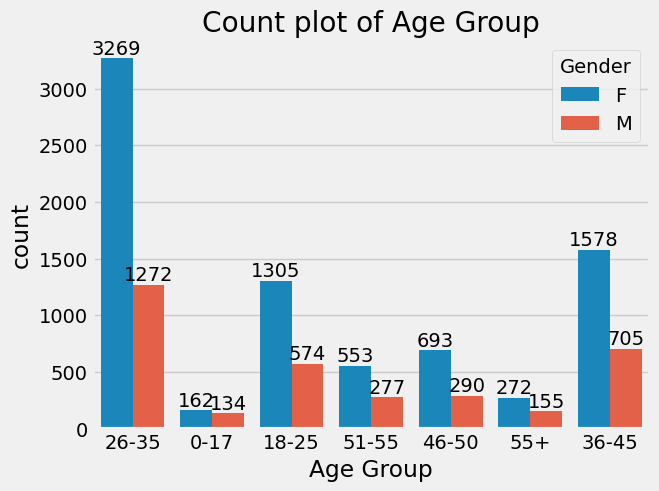

In [18]:
ax = sns.countplot(x = 'Age Group', data = data, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
    
plt.title("Count plot of Age Group")

<Axes: xlabel='Age Group', ylabel='Amount'>

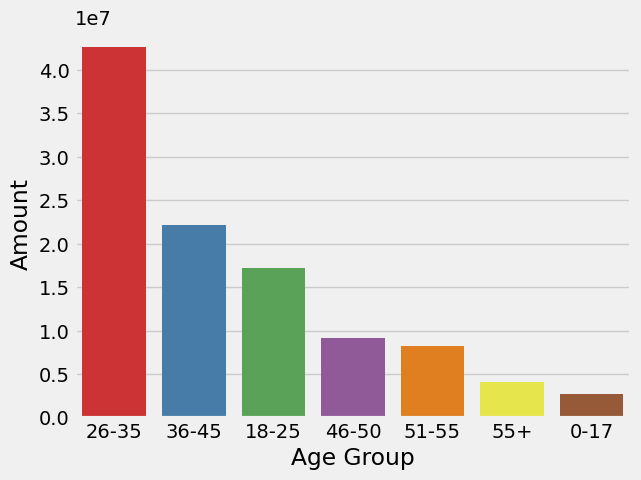

In [19]:
#Total Amount vs Age Group
sales_age = data.groupby(['Age Group'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.barplot(x = 'Age Group', y= 'Amount', data = sales_age, palette = 'Set1')


#### From the above graph we can see that most of the buyers are of age geoup between 26-35 years female.

<Axes: xlabel='State', ylabel='Orders'>

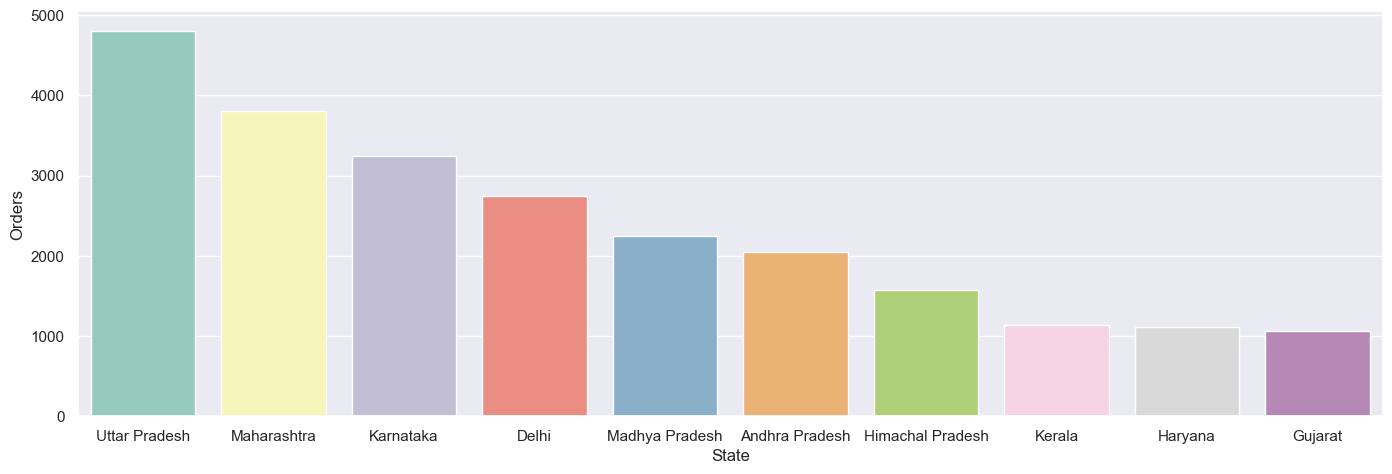

In [20]:
# Total no of orders from top 10 states
sales_state = data.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders', palette='Set3')

<Axes: xlabel='State', ylabel='Amount'>

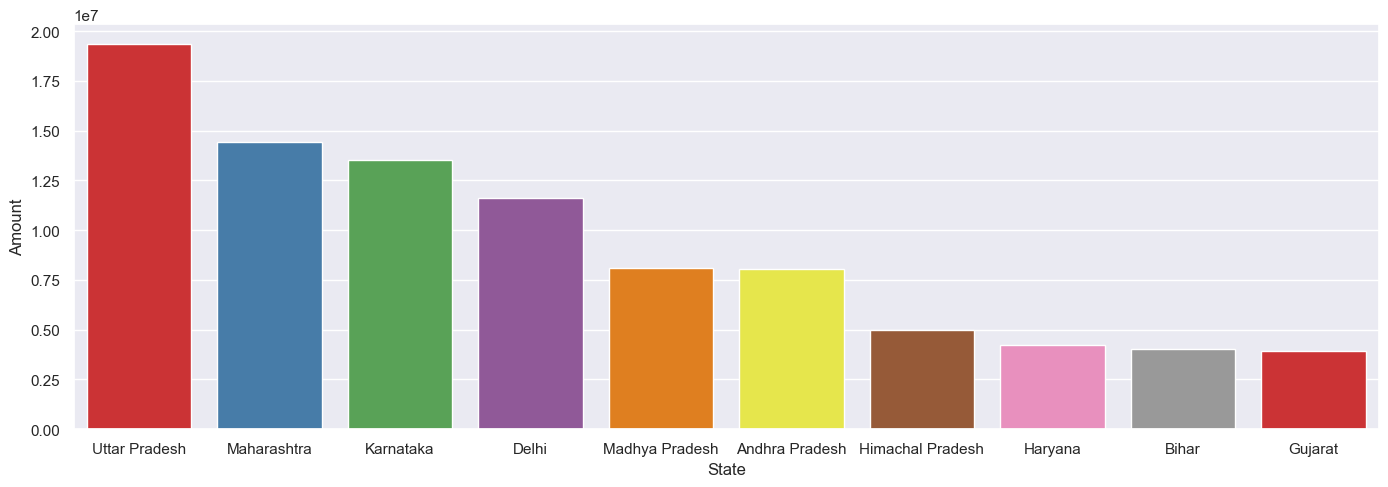

In [21]:
#Total amount/sales from top 10 states
sales_state = data.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount', palette='Set1')


#### From above graph we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

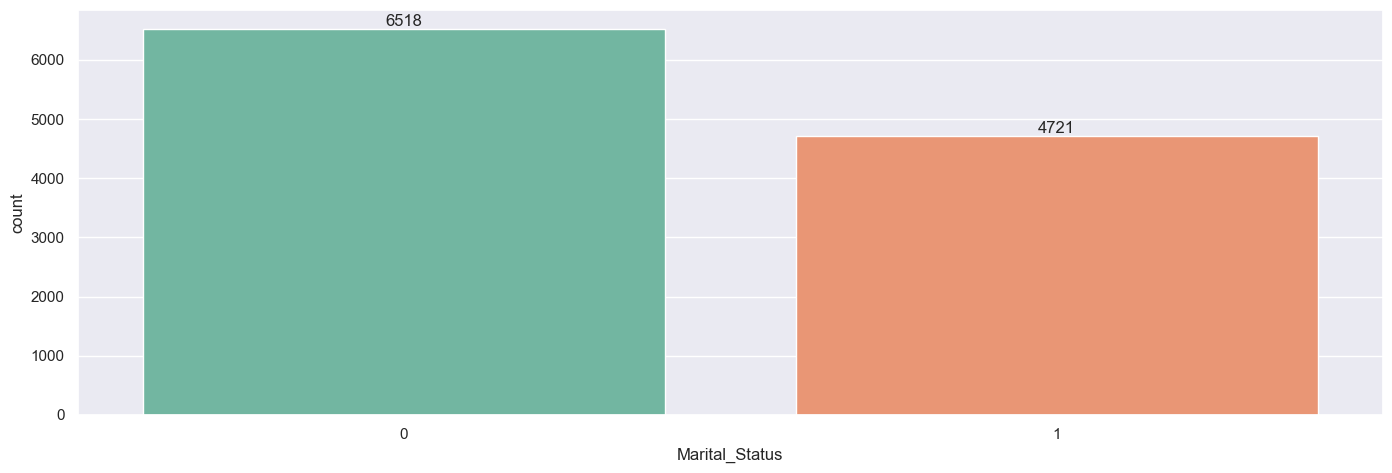

In [22]:
ax = sns.countplot(data= data, x= 'Marital_Status', palette = 'Set2')
sns.set(rc = {'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

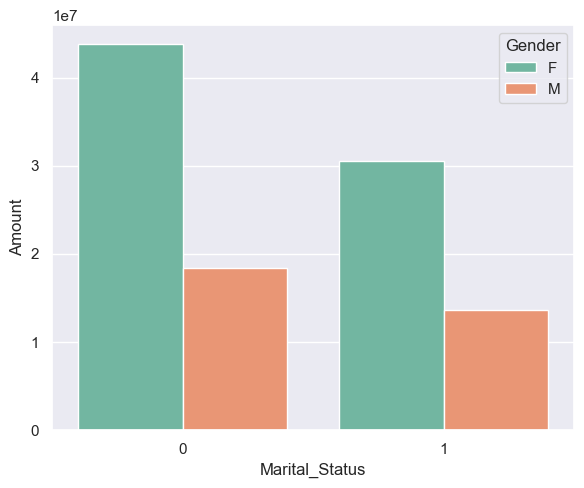

In [23]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(6,5)})

sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue='Gender', palette='Set2')

#### From the above the graph we can see that most of the buyers are married (Women) and they have high purchasing power.

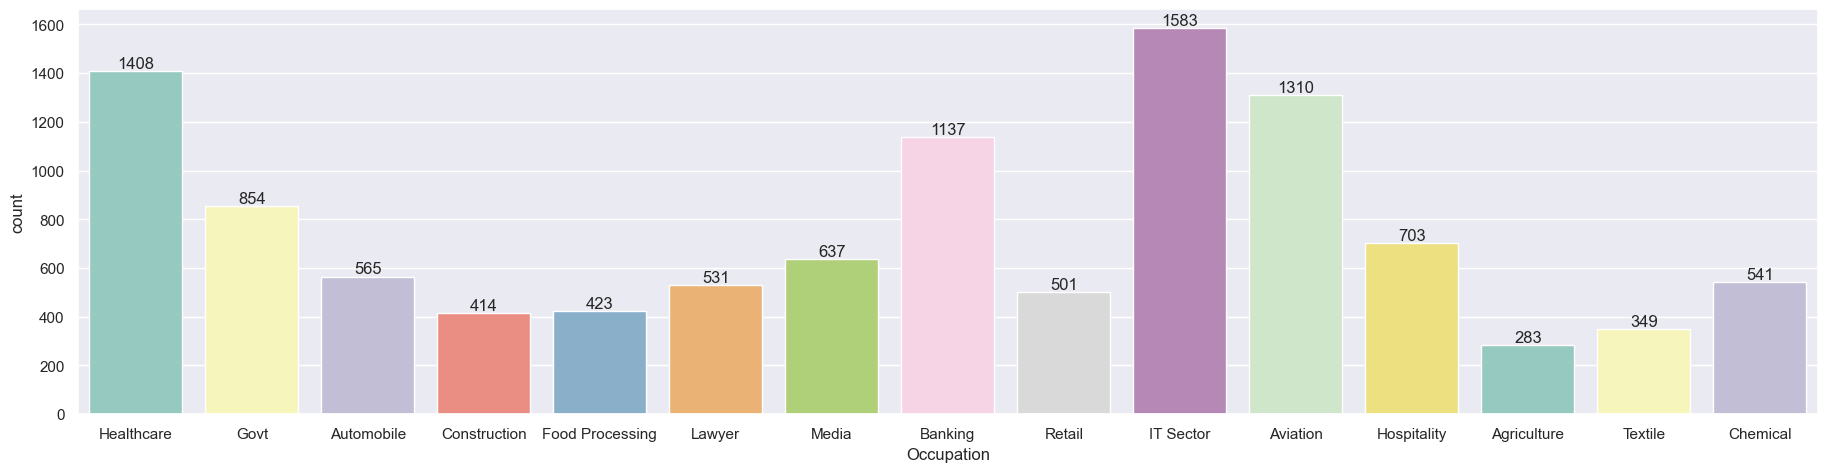

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data,x = 'Occupation', palette = 'Set3')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

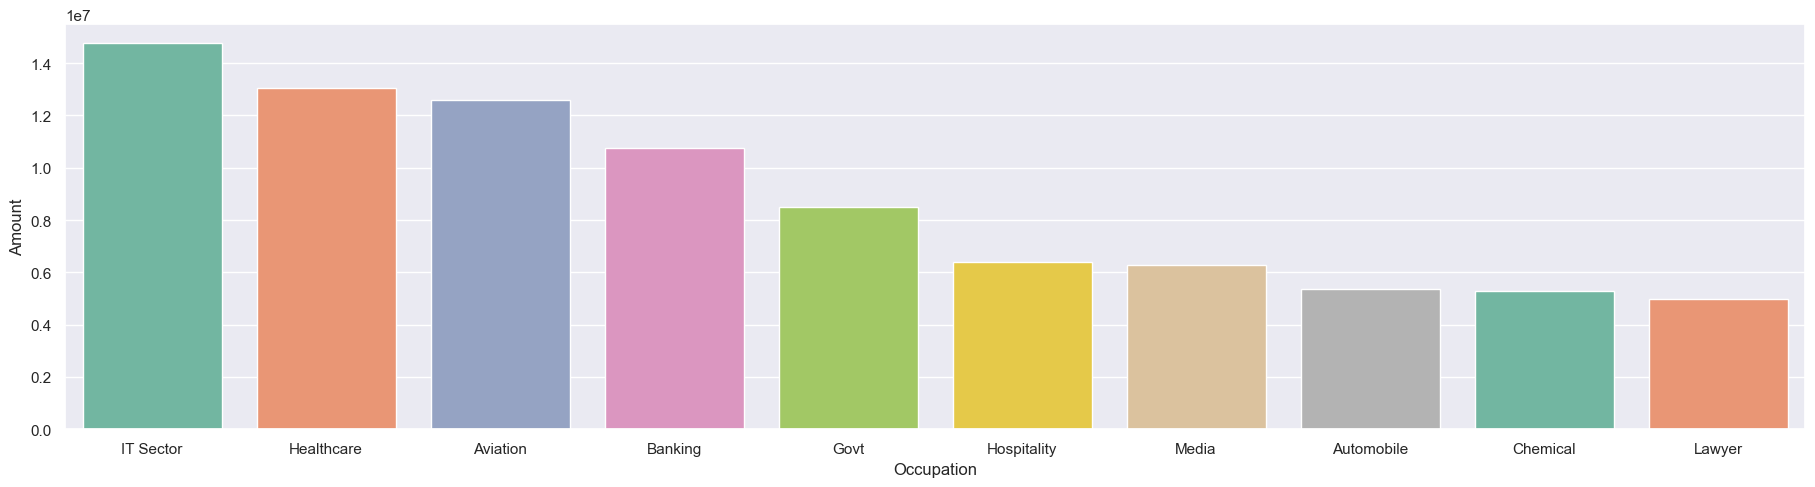

In [27]:
sales_state = data.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount', palette='Set2')

#### From above graph we can see that most of the buyers are working in IT, Healthcare and Aviation sector.

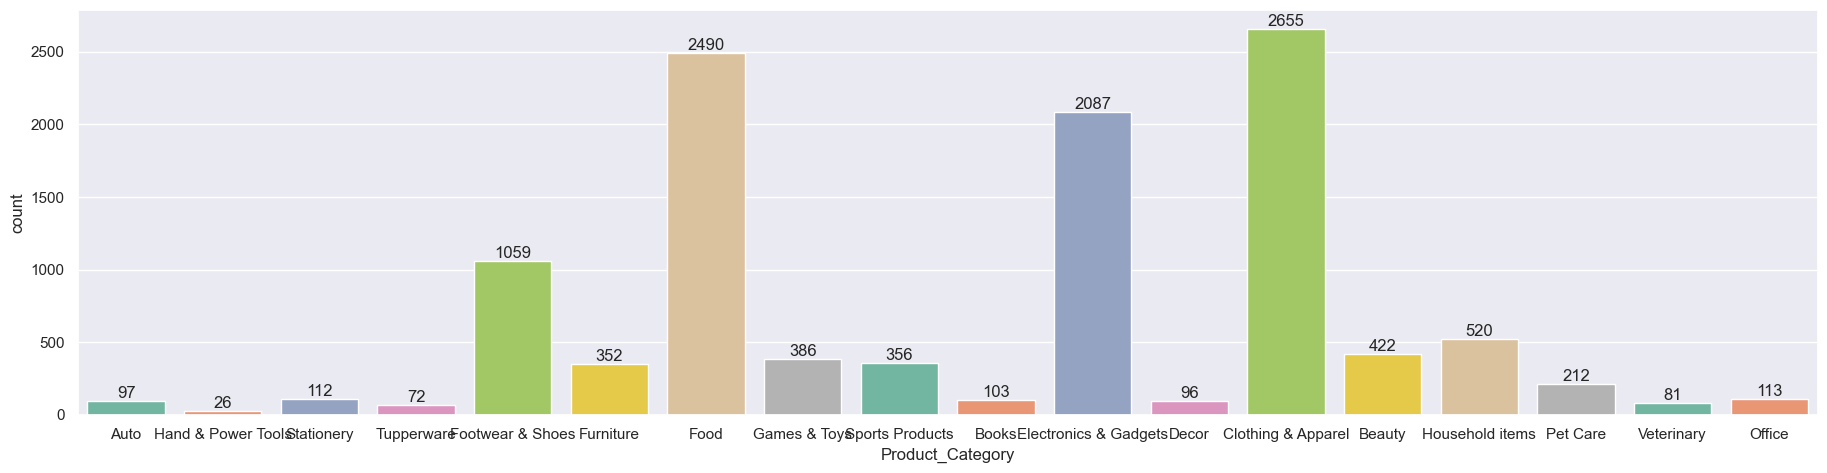

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data,x = 'Product_Category', palette = 'Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

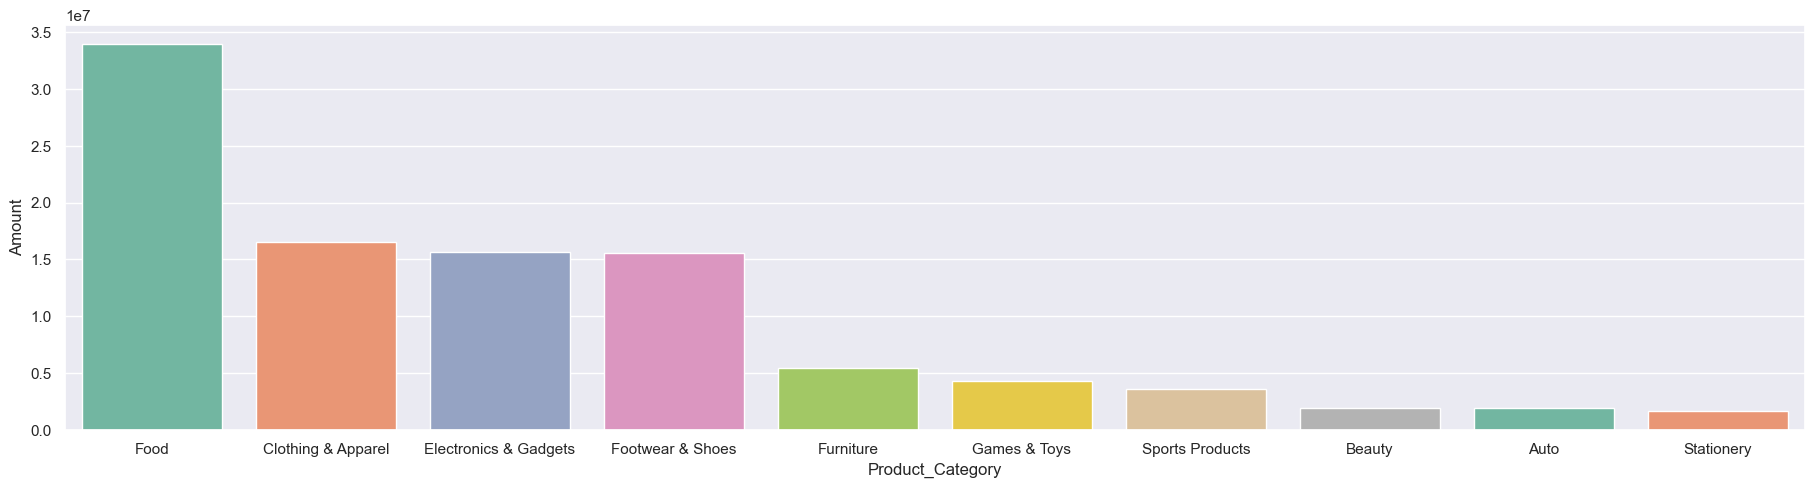

In [30]:
sales_state = data.groupby(['Product_Category'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount', palette='Set2')

#### From above graph we can see that most of the sold products are from Food, Clothing and Electronics Category.

<Axes: xlabel='Product_ID', ylabel='Amount'>

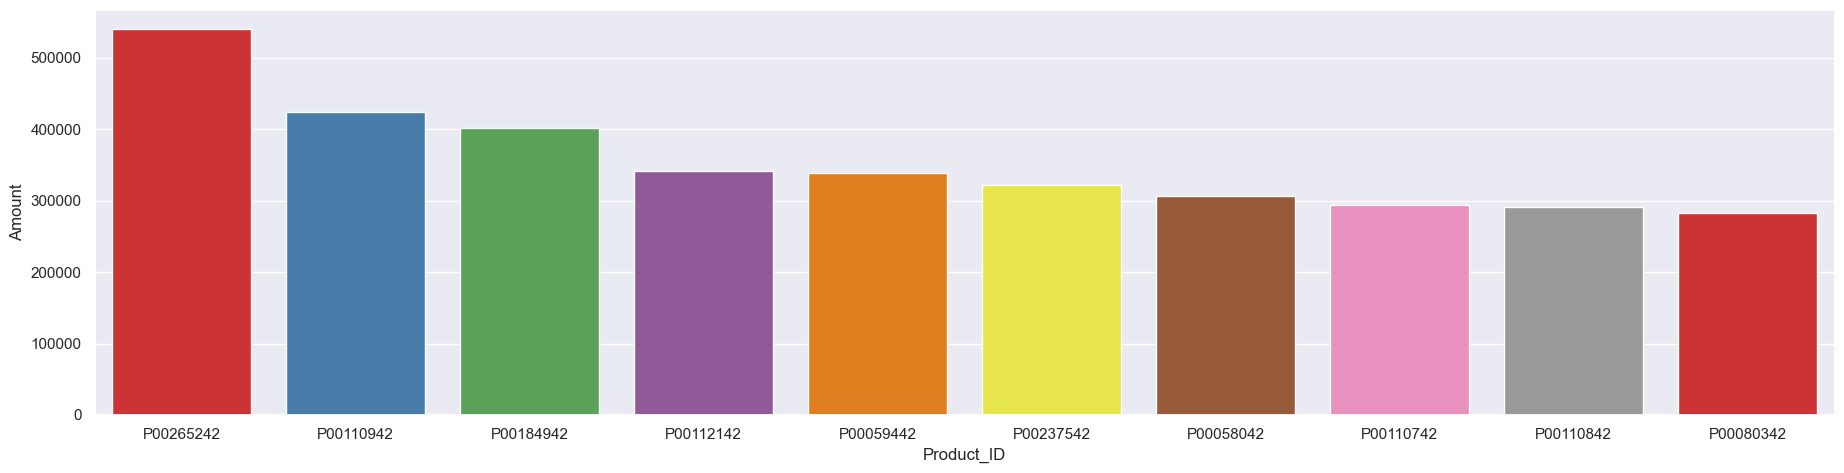

In [32]:
sales_state = data.groupby(['Product_ID'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = sales_state, x = 'Product_ID', y = 'Amount', palette='Set1')

<Axes: xlabel='Product_ID'>

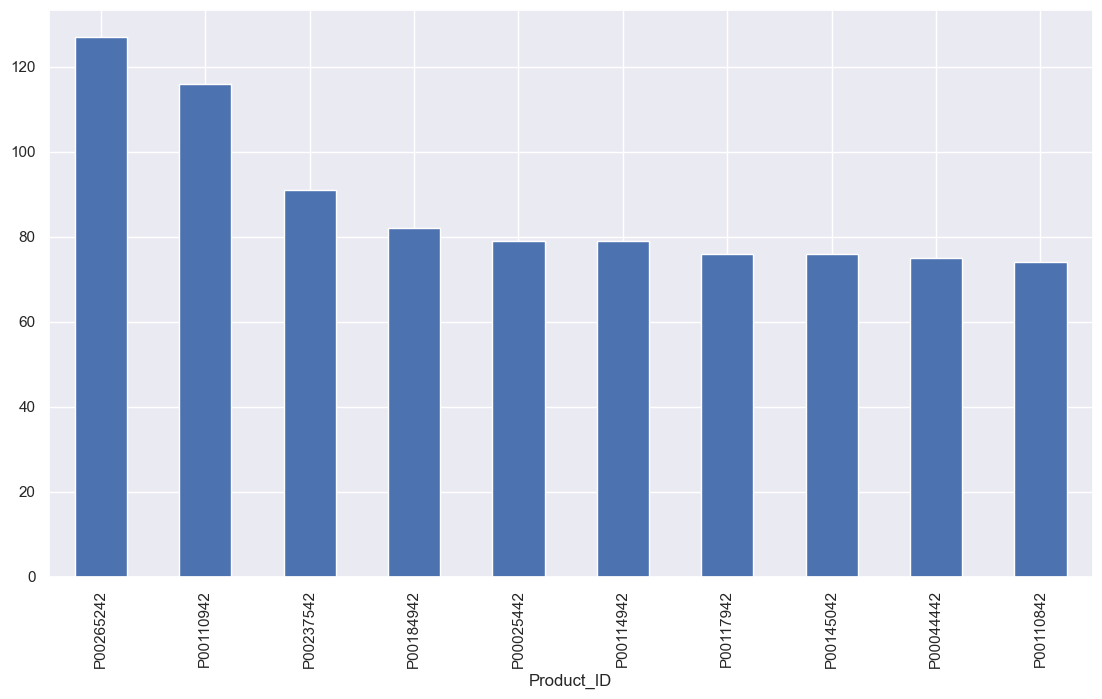

In [34]:
# Top 10 most sold product (same as done above).

fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar')

## Conclusion:

#### Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.